# COVID19 PREDICTION

In [ ]:
PROJECT PROPOSAL - 
    
    Build an advanced Machine Learning model to predict the patients infected with COVID19 by taking the symptoms as the input.
    And gaining valuable insights from the data making it helpful to the Drug Organization to develop a drug for specific symptoms.

Questions To Answer - 

    * Among the data how many people are actually covid positive?
    * Among the covid positive which are the major symptoms?
    * Are age groups above 60 the most affected?
    * Does a person having corona have cough?
    * Which gender is most likely to have been infected?
    * Do covid patients have all the symptoms?
    * What do other value signify in the target column?
    

In [ ]:
Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?  

How is it going to impact the medical field when it comes to effective screening and reducing health care burden. 

If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.



1. Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment? 
    
    * The idea behind this proposal or project is to reduce the stress and burden over the medical domain. 
    
    * People infected with COVID have to get tested in the hospitals whether they are positive or not infected and the confirmation of infected or not take a day or two.
    
    * But by using this application or model we can enter the symptoms, age and gender to check whether the patient is covid infected or not from the ease of their house. 
    
    * This reduce the jargon and cushion the medical institutions.
    
    * And the results provided by this model is almost 95% accurate.

2. How is it going to impact the medical field when it comes to effective screening and reducing health care burden. 
    
    * As i have proposed earlier, by using this model the medical organizations can get resuls in minutes and infact seconds.
    
    * This application can be deployed to the public and they can self qurantine is positive after testing positive.

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.

    * Currently the test are conducted using the saliva samples from the patients body.
    
    * But by using this application the hospitals or medical organisations can test by just using the patients symptoms.
    
    * The proposed system can help detect a the covid positive patients from the given data in seconds reducing the stress on health care.
    
    * By using this model we can detect the headache or any other regular fever in seconds. Any flu can be detected by taking the symptoms as input!

In [1]:
# importing all the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
# importing the csv file and storing it in a dataframe df 

dataset = pd.read_csv('corona_tested_1.csv')

In [4]:
# priting the first five rows of the datatset

dataset.head()

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           True  False        True               False   
1       2  11-03-2020          False   True       False               False   
2       3  11-03-2020          False   True       False               False   
3       4  11-03-2020           True  False       False               False   
4       5  11-03-2020           True  False       False               False   

  Headache    Corona Age_60_above  Sex           Known_contact  
0    False  negative          NaN  NaN                  Abroad  
1    False  positive          NaN  NaN                  Abroad  
2    False  positive          NaN  NaN                  Abroad  
3    False  negative          NaN  NaN                  Abroad  
4    False  negative          NaN  NaN  Contact with confirmed

In [5]:
# seeing how many rows and columsn are there using the shape function

dataset.shape

(278848, 11)

The given datframe has 278848 rows and 11 columns in the dataframe 

In [6]:
# seeing the datatypes, number of coulmns and the number of missing values in the given dataframe

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


While checking all the coulmns we could see the Ind_ID was the only columns which was integer and the rest was object datatype.

But the columns Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Age_60_above and sex have missing values.b


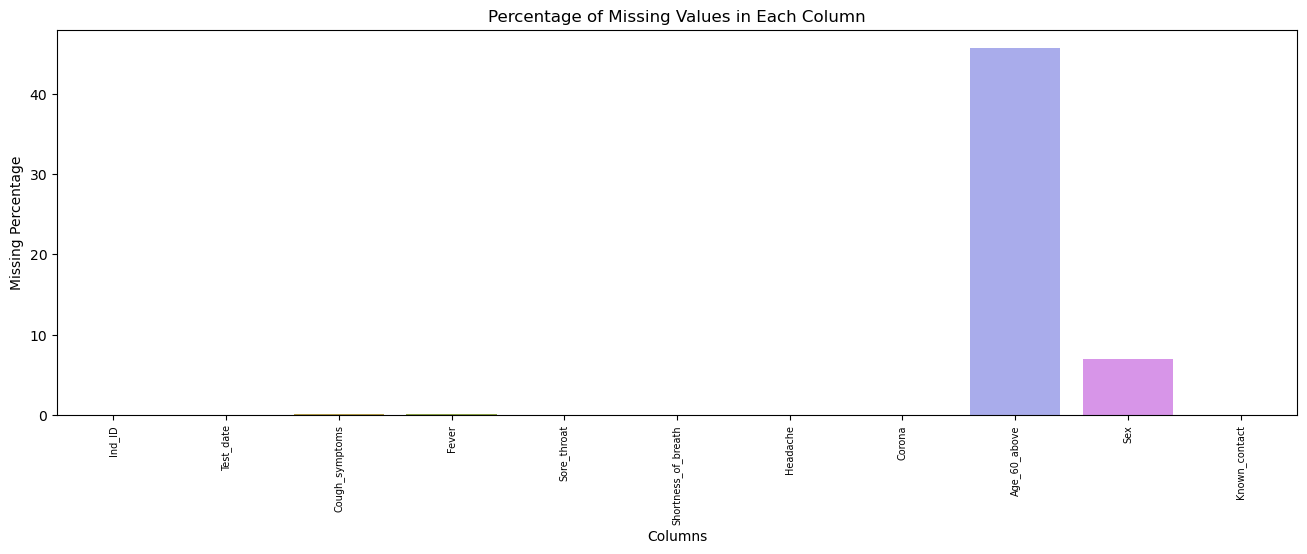

In [7]:
#plotting the null values
missing = pd.DataFrame(dataset.isnull().sum() * 100 / len(dataset)).reset_index()
missing.columns = ['Column', 'Missing Percentage']

plt.figure(figsize=(16, 5))
fig = sns.barplot(x='Column', y='Missing Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Values in Each Column')
plt.show()


Around 45% of the people were tested negative

In [9]:
dataset[dataset.Corona=='other']

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
5            6  11-03-2020           True  False       False   
29          30  11-03-2020           True  False       False   
55          56  11-03-2020           True   True        True   
71          72  11-03-2020           True  False       False   
140        141  11-03-2020          False  False       False   
...        ...         ...            ...    ...         ...   
277588  277589  30-04-2020          False  False       False   
278135  278136  30-04-2020          False  False       False   
278151  278152  30-04-2020          False  False       False   
278469  278470  30-04-2020          False  False       False   
278804  278805  30-04-2020          False  False       False   

       Shortness_of_breath Headache Corona Age_60_above     Sex  \
5                    False    False  other          NaN     NaN   
29                   False    False  other          NaN     NaN   
55                   False    False  other          NaN     NaN   
71                   False    False  other          NaN     NaN   
140                  False    False  other          NaN     NaN   
...                    ...      ...    ...          ...     ...   
277588               False    False  other          NaN    male   
278135               False    False  other          NaN    male   
278151               False    False  other          NaN  female   
278469               False    False  other          NaN    male   
278804               False    False  other          NaN    male   

                 Known_contact  
5       Contact with confirmed  
29                      Abroad  
55                       Other  
71                       Other  
140                      Other  
...                        ...  
277588                   Other  
278135                   Other  
278151                   Other  
278469                   Other  
278804                   Other  

[3892 rows x 11 columns]

===============================================================================================================================

## Data Preprocessing

In [10]:
df = dataset

TAKING THE COPY OF THE DATASET IN TO DF, TO ACHIEVE DATA RECOVERY

In [11]:
# Removing unwanted columns

df = df.drop(['Ind_ID','Test_date','Known_contact'],axis=1)

REMOVING COLUMNS WHICH ARE OF NOT THAT IMPORTANCE. 

BY DOING DO WE ARE REDUCING COMPUTATIONAL COST AND TIME

In [12]:
# checking the number of null values on the columns

df.isnull().sum()

Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
dtype: int64

THE COLUMNS Cough_symptoms, Fever HAVE 252 NULL VALUES AND THE COLUMNS Age_60_above ABOUT 127320 AND Sex HAVE 19563 NULL VALUES.

BUT ON FURTHER SUMMARIZATION WE CAN SEE THE AGE AND SEX COLUMN HAVE NaN VALUES

In [13]:
# checking the percentage of null values in the Age_60_above column

dataset['Age_60_above'].isnull().sum()/len(dataset)*100

45.6592839109479

The null values in the Age_60_above column accounts for about 45%

In [14]:
# checking the percentage of null values in the Sex column

dataset['Sex'].isnull().sum()/len(dataset)*100

7.015650103282074

THE NULL VALUES IN THE Sex COLUMN ACCOUNTS FOR ABOUT 7%

In [15]:
# applying statistcal formula on the columns but the columns are in object datatype

dataset.describe()

Ind_ID
count  278848.000000
mean   139424.500000
std     80496.628269
min         1.000000
25%     69712.750000
50%    139424.500000
75%    209136.250000
max    278848.000000

In [16]:
# REPLACING THE NULL VALUES WITH THE MODE OF THE COLUMNS

#columns with NULL VALUES
column_names = ['Cough_symptoms','Fever', 'Sore_throat', 'Shortness_of_breath','Headache']

#function to fill the null values
def fill_mode(columns):
    
    # for loop to iterate through all the columns in the given list
    for i in columns:
        
        # using the fillna method to fill the null values
        df[i].fillna(df[i].mode()[0], inplace=True)
    return df

fill_mode(column_names)

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0                 True  False         True                False     False   
1                False   True        False                False     False   
2                False   True        False                False     False   
3                 True  False        False                False     False   
4                 True  False        False                False     False   
...                ...    ...          ...                  ...       ...   
278843           False  False        False                False     False   
278844           False  False        False                False     False   
278845           False  False        False                False     False   
278846           False  False        False                False     False   
278847           False  False        False                False     False   

          Corona Age_60_above     Sex  
0       negative          NaN     NaN  
1       positive          NaN     NaN  
2       positive          NaN     NaN  
3       negative          NaN     NaN  
4       negative          NaN     NaN  
...          ...          ...     ...  
278843  positive          NaN    male  
278844  negative          NaN  female  
278845  negative          NaN    male  
278846  negative          NaN    male  
278847  negative          NaN  female  

[278848 rows x 8 columns]

ALL THE NULL VALUES WERE REPLACED WITH THE MODE OF THE COLUMNS

In [17]:
#CHECKING FOR THE CHANGES 

df.isnull().sum()

Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           127320
Sex                     19563
dtype: int64

ALL THE NULL VALUES IN THE COLUMN MENTIONED BEFORE WERE REPLACED WITH MODE OF THE RESPECTIVE COLUMNS

In [18]:
# CONVERTING THE COLUMNS HAVING THE NaN VALUES 

# as this column has about 45% missing values. Removing was not an option. They were imputed with the mode of the columns.
df['Age_60_above'].replace(np.NaN, df['Age_60_above'].mode()[0], inplace=True)

# rermoving or replacing the below feature having NaN values with the mode of the column.
df['Sex'].replace(np.NaN, df['Sex'].mode()[0], inplace=True)

In [19]:
# df['Cough_symptoms'] = df['Cough_symptoms'].apply(lambda x: 1 if x == True else 0)

In [20]:
df.isnull().sum()


Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
dtype: int64

ALL THE NULL AND NaN VALUES WERE REPLACED WITH THE MODE OF THE RESPECTIVE FEATURES.

In [21]:
df.head()

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0            True  False         True                False     False   
1           False   True        False                False     False   
2           False   True        False                False     False   
3            True  False        False                False     False   
4            True  False        False                False     False   

     Corona Age_60_above     Sex  
0  negative           No  female  
1  positive           No  female  
2  positive           No  female  
3  negative           No  female  
4  negative           No  female

In [22]:
df.head(5)

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0            True  False         True                False     False   
1           False   True        False                False     False   
2           False   True        False                False     False   
3            True  False        False                False     False   
4            True  False        False                False     False   

     Corona Age_60_above     Sex  
0  negative           No  female  
1  positive           No  female  
2  positive           No  female  
3  negative           No  female  
4  negative           No  female

In [23]:
result = pd.concat([dataset, df], axis=1)

result.to_csv('result.csv')

In [24]:
df['Cough_symptoms'].value_counts()

Cough_symptoms
False    236620
True      42228
Name: count, dtype: int64

In [25]:
# CONVERTING THE BOOLEAN FEATURES TO INTEGER FOR THE MACHINE TO UNDERSTAND

# the columns for the values to be encoded
column_names = ['Fever', 'Sore_throat', 'Shortness_of_breath','Headache','Cough_symptoms']


# Iterate through specified columns and convert boolean values to 1 or 0
# for loop to access each column among the list
for column in column_names:
    
    # to capture the index and value in the rows of the columns
    for index, value in df[column].items():
        
        #using isinstance to check whether the value was boolen, if yes convert them to integer 1 for True or 0 for False
        if isinstance(value, bool):
            df.at[index, column] = int(value)
        

In [26]:
df.head()

Cough_symptoms Fever Sore_throat Shortness_of_breath Headache    Corona  \
0              1     0           1                   0        0  negative   
1              0     1           0                   0        0  positive   
2              0     1           0                   0        0  positive   
3              1     0           0                   0        0  negative   
4              1     0           0                   0        0  negative   

  Age_60_above     Sex  
0           No  female  
1           No  female  
2           No  female  
3           No  female  
4           No  female

In [27]:
# USING DATA WRANGLING TECHNIQUES TO CONVERT THE OBJECT DATA TO NUMERIC

In [28]:
le = LabelEncoder()

# encoding our target column to binary format
le.fit(df['Corona'])
df['Corona'] = le.transform(df['Corona'])


#encoding our Age_above_60 column using labelencoder'
le.fit(df['Age_60_above'])
df['Age_60_above'] = le.transform(df['Age_60_above'])
    
    
#encoding the sex column to binary format
le.fit(df['Sex'])
df['Sex'] = le.transform(df['Sex'])

In [29]:
df.head()

Cough_symptoms Fever Sore_throat Shortness_of_breath Headache  Corona  \
0              1     0           1                   0        0       0   
1              0     1           0                   0        0       2   
2              0     1           0                   0        0       2   
3              1     0           0                   0        0       0   
4              1     0           0                   0        0       0   

   Age_60_above  Sex  
0             0    0  
1             0    0  
2             0    0  
3             0    0  
4             0    0

FINAL CHECK BEFORE GOING FUTHER INTO THE PROJECT. 

ALL THE FEATURES ARE HANDLED WELL FROM MISSING VALUES, DATA WRANGLING AND CONVERSION OF BOOLEAN DATA TO NUMERIC.


===============================================================================================================================

## Hypothesis Testing

In [30]:
# USING THE HYPOTHESIS TESTING APPROACH TO KNOW THE RELATIONSHIP BETWEEN THE FEATURES AND
# LETS US KNOW THE IMPORTANT FEATURES TO HELP US GATHER MORE INFORMATION ABOUT THE FUTURE ANALYSIS

In [ ]:
corona_p = df[df[Corona]==2]

1. Watching the relationship b/w Cough_symptoms and our target Corona Feature : - A person having corona has cough or not 

Null Hypothesis : A person having corona does not have cough.
    
Alternate Hypothsis : A person having corona has cough.
    
By using Chi-Squared test to determine the relationship between them

In [31]:
contingency_table = pd.crosstab(df['Cough_symptoms'], df['Corona'], margins=True)

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi2 Stat:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi2 Stat: 10607.073099213541
P-Value: 0.0
Degrees of Freedom: 6
Expected Frequencies Table:
[[220818.91474925   3302.60586413  12498.47938662 236620.        ]
 [ 39408.08525075    589.39413587   2230.52061338  42228.        ]
 [260227.           3892.          14729.         278848.        ]]


AS THE P OR SIGNIFICANCE VALUE IS BELOW THE 0.05 SO WE ARE REJECTING THE NULL HYPOTHESIS.

THIS PROVES THAT ----- A person having corona has cough.

2. Watching the relationship b/w Age and our target Corona Feature : - A person having corona is above 60

Null Hypothesis : Most of the people having corona are not above 60
    
Alternate Hypothsis : Most of the people having corona are above 60
    
By using Chi-Squared test to determine the relationship between them

In [32]:
contingency_table = pd.crosstab(df['Age_60_above'], df['Corona'], margins=True)

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi2 Stat:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi2 Stat: 610.0741400568826
P-Value: 1.56533185313237e-128
Degrees of Freedom: 6
Expected Frequencies Table:
[[236126.55002367   3531.54950367  13364.90047266 253023.        ]
 [ 24100.44997633    360.45049633   1364.09952734  25825.        ]
 [260227.           3892.          14729.         278848.        ]]


AS THE P OR SIGNIFICANCE VALUE IS ABOVE THE 0.05 SO WE ARE ACCEPTING THE NULL HYPOTHESIS.

THIS PROVES THAT ----- Most of the people having corona are not above 60.

## INSIGHTS FROM HYPOTHESIS TESING 

TEST 1 : THE PERSON HAVING CORONA DOES HAVE COUGH
    
TEST 2 : NOT ALL THE PATIENTS 

===============================================================================================================================

## EDA

#### Univariate Analysis

0.0

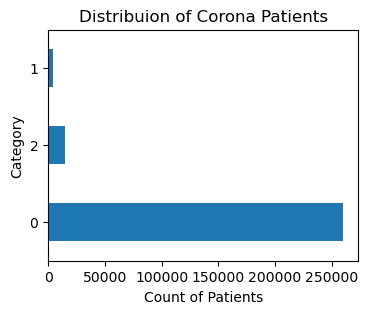

In [152]:
#CHECKING THE DISTRIBUTION OF OUR TARGET VARIABLE
df['Corona'].value_counts().plot(kind='barh',figsize=(4,3))
plt.xlabel('Count of Patients')
plt.ylabel('Category')
plt.title('Distribuion of Corona Patients')


#CALCULATING THE PERCENTAGE OF PEOPLE TESTED NEGATIVE
len(df[df['Corona']=='negative'].value_counts())/df.shape[0]*100

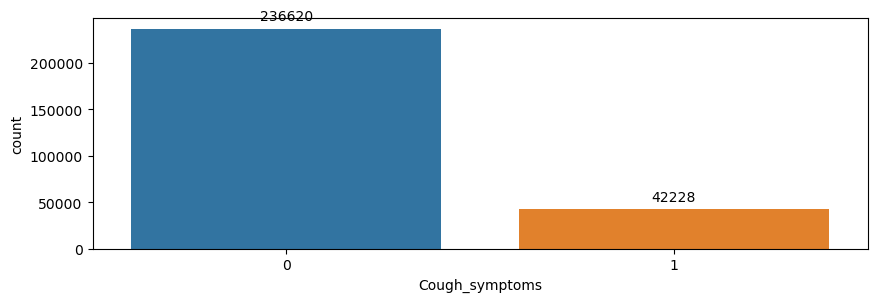

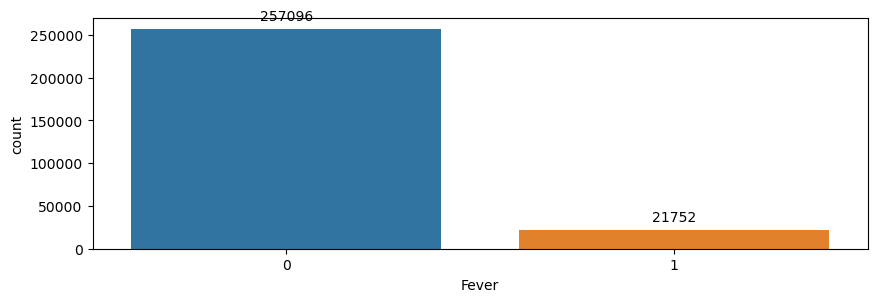

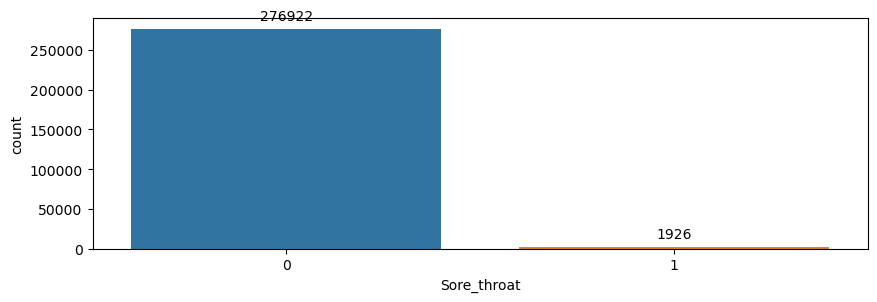

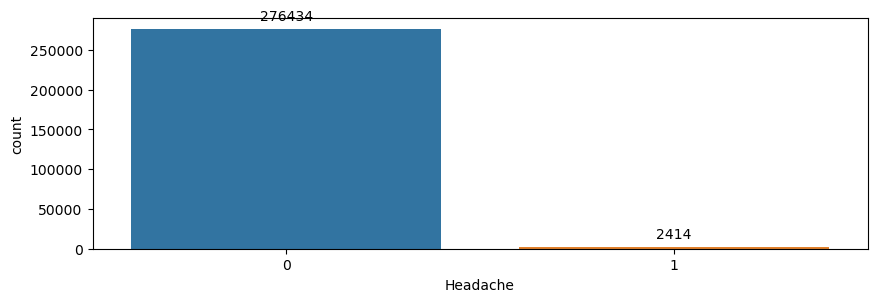

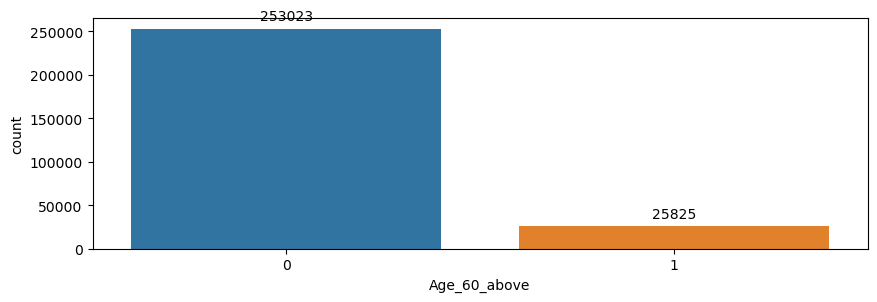

In [33]:
#PERFORMING UNIVARIATE ANALYSIS ON ALL THE COLUMNS USING THE PARPLOT FROM THE SNS LIBRARY

# looping through all the coulmns using the enumarate function
for j, predictor in enumerate(df):
    plt.figure(figsize = (10,3))
    
    #plotting the countplot using the sns.countplot function
    ax = sns.countplot(data=df, x=predictor)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 9), 
                    textcoords='offset points')
plt.show()


FROM THE ABOVE PLOTTING WE CAN SAY THAT :-
    * THE PATIENTS HAVING NO COUGH SYMPTOMS ARE HIGH
    * THE PATIENTS HAVING NO FEVER ARE HIGH
    * THE PATIENTS HAVING NO SORE THROAT ARE HIGH
    * THE PATIENTS HAVING NO SHORTNESS OF BREATH ARE HIGH
    * THE PATIENTS HAVING NO HEADACHE ARE HIGH
    * THE PATIENTS HAVING NO CORONA NEGATIVE ARE HIGH
    * THE PATIENTS AGE BELOW 60 ARE HIGH
    * THE FEMALE PATIENTS ARE HIGH COMPARED TO MEN

In [110]:
df['Corona'].value_counts()

Corona
0    260227
2     14729
1      3892
Name: count, dtype: int64

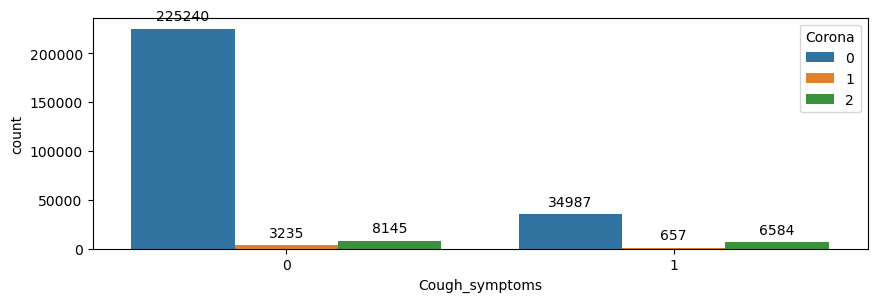

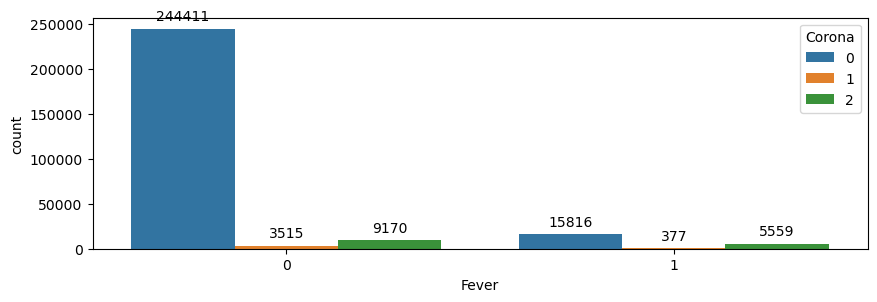

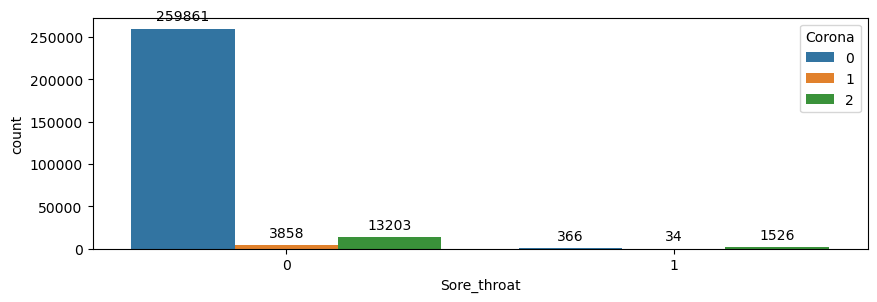

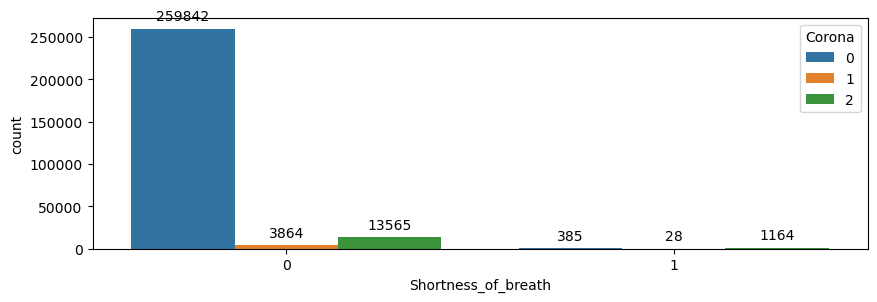

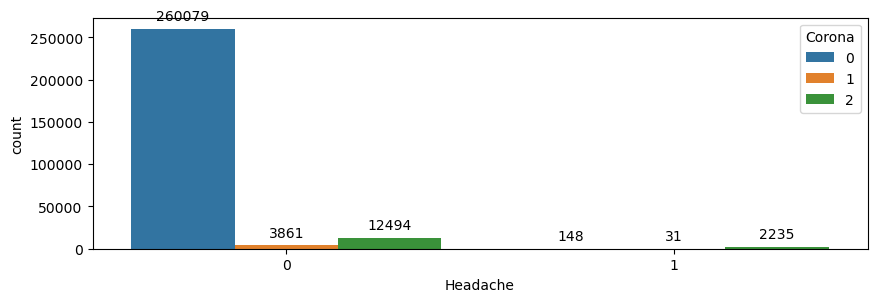

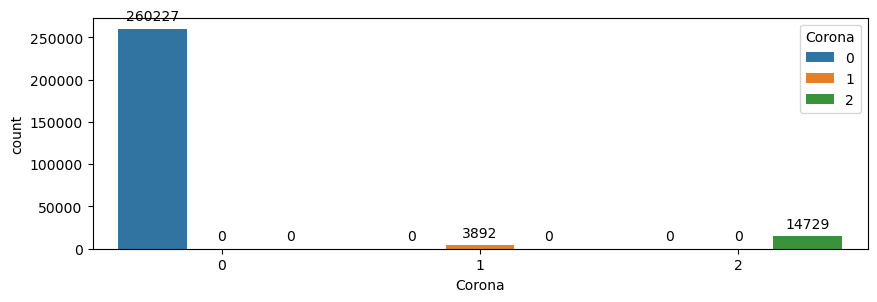

In [35]:
#PERFORMING UNIVARIATE ANALYSIS ON ALL THE COLUMNS USING THE PARPLOT FROM THE SNS LIBRARY BUT GIVING HUE='CORONA'

# looping through all the coulmns using the enumarate function
for j, predictor in enumerate(df):
    plt.figure(figsize = (10,3))
    
    #plotting the countplot using the sns.countplot function
    plot = sns.countplot(data=df, x=predictor, hue='Corona')
    
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 9), 
                    textcoords='offset points')
plt.show()

FROM THE ABOVE PLOTTING WE CAN SAY THAT :-
    * THE PATIENTS HAVING NO COUGH SYMPTOMS AND HAVE CORONA NEGATIVE ARE HIGH
    * THE PATIENTS HAVING NO FEVER AND HAVE CORONA NEGATIVE ARE HIGH
    * THE PATIENTS HAVING NO SORE THROAT AND HAVE CORONA NEGATIVE ARE HIGH
    * THE PATIENTS HAVING NO SHORTSNESS OF BREATHH AND HAVE CORONA NEGATIVE ARE HIGH
    * THE PATIENTS HAVING NO HEADACHE AND HAVE CORONA NEGATIVE ARE HIGH
    * THE PATIENTS HAVING AGE BELOW 60 AND HAVE CORONA NEGATIVE ARE HIGH
    * THE PATIENTS HAVING BEING FEMALES AND HAVE CORONA NEGATIVE ARE HIGH, BUT MALES ARE ALSO IN THE SAME RANGE AS WELL.

In [36]:
#CHECKING THE DISTRIBUTION OF THE DATA HAVING CORONA POSITIVE

In [37]:
#new dataset having all records filtered to corona positive 

df_positive = df[df['Corona']==2]

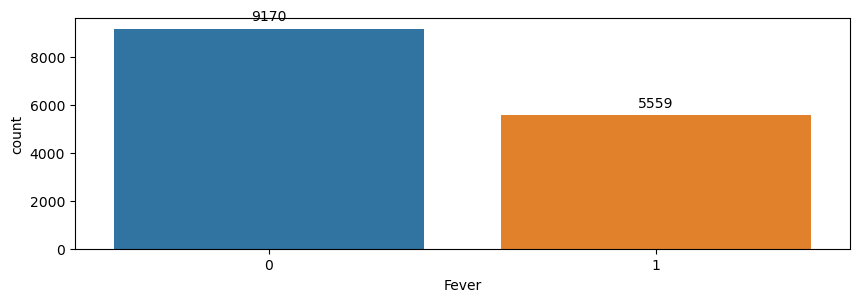

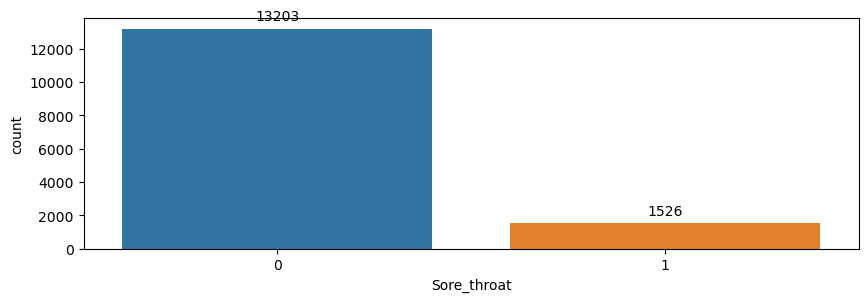

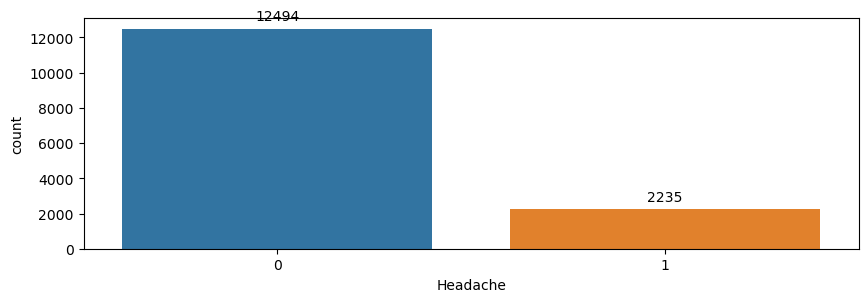

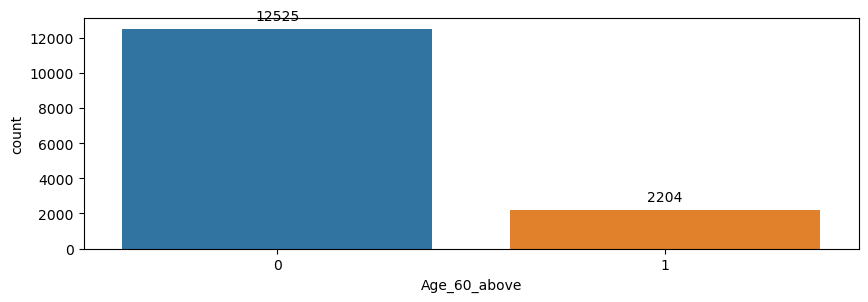

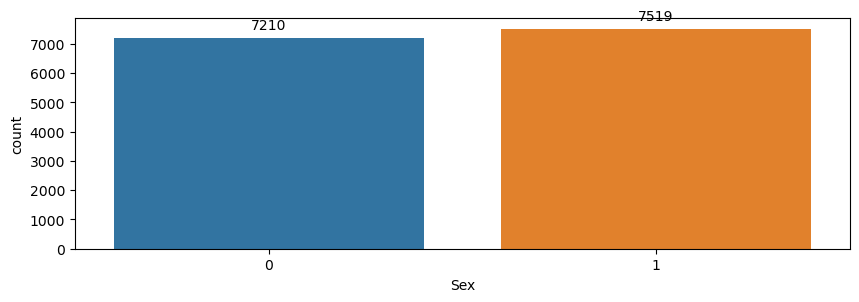

In [38]:
for j, predictor in enumerate(df_positive):
    plt.figure(figsize = (10,3))
    
    #plotting the countplot using the sns.countplot function
    ax = sns.countplot(data=df_positive, x=predictor)

    # using the annotate function to print the values above the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 9), 
                    textcoords='offset points')
plt.show()

FROM FURTHER ANALYSIS USING THE ABOVE PLOTTING WE CAN SAY THAT :-
    * PATIENTS HAVING " NO COUGH SYMPTOMS " ARE CORONA POSITIVE ARE HIGH
    * PATIENTS HAVING " NO FEVER SYMPTOMS " ARE CORONA POSITIVE ARE HIGH
    * PATIENTS HAVING " NO SORE THROAT ARE " CORONA POSITIVE ARE HIGH
    * PATIENTS HAVING " SHORTNESS OF BREATH " ARE CORONA POSITIVE ARE HIGH
    * PATIENTS HAVING " NO HEADACHE " ARE CORONA POSITIVE
    * PATIENTS WHICH ARE " AGE BELOW 60 " ARE CORONA POSITIVE ARE HIGH
    * " MALE PATIENTS "HAVING CORONA POSITIVE ARE HIGH


In [39]:
# PLOTTING THE COUNT OF SYMPTOMES WITHIN THE PEOPLE HAVING CORONA POSTIIVE 

In [124]:
#taking the symtoms featurs into a list
columns = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']

#initiating am empty list to append the symptoms and the count
item = {}

# iterating through all the columns in the list
for column in columns:
    #taking the count of feature having corona positive and having symptoms
    length = len(df[(df[column] == 1) & (df['Corona'] == 2) ])
    name = column
    
    #appending to the dictionary
    item[name]=length
    
#creating a new dataset containing the symptoms list
positive_sym = pd.DataFrame(item,index=['Count'])

In [238]:
# PRINTING THE SYMPTOMS DATAFRAME
positive_sym

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache
Count            6584   5559         1526                 1164      2235

In [138]:
positive.value_counts()

Sex
False    149721
True     129127
Name: count, dtype: int64

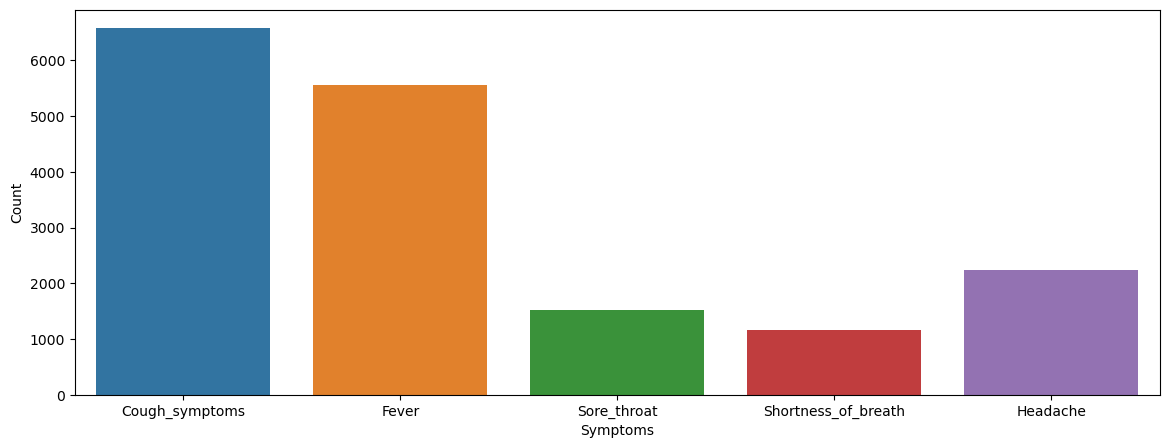

In [237]:
# TAKNIG THE SYMPTOMS LIST AND PLOTTING THEM USUNG A BARPLOT

plt.figure(figsize=(14,5))
plt.xlabel('Symptoms')
plt.ylabel('Count')
sns.barplot(positive_sym)
plt.show()

FROM THE ABOVE GRAPH WE CAN SEE THAT :- COUGH AND FEVER ARE THE MOST RECORDED SYMPTOMS AMONG THE COVI POSITIVE PATIENTS.

WHILE SHORTNESS OF BREATH WAS SEEN IN LEAST PATIENTS.

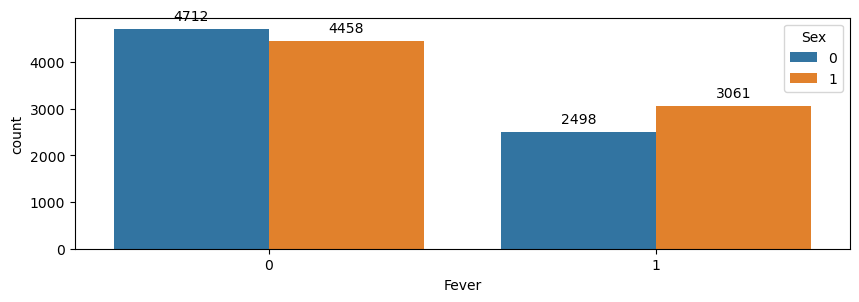

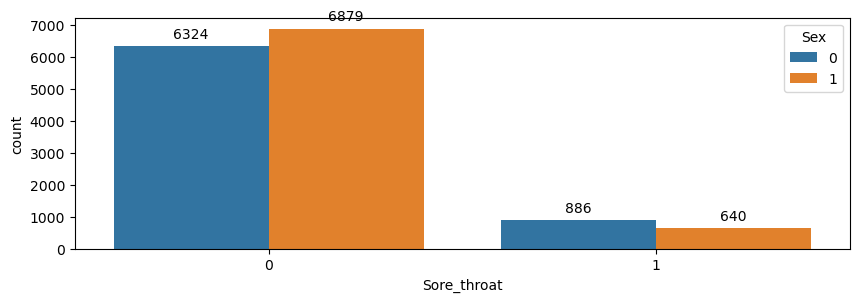

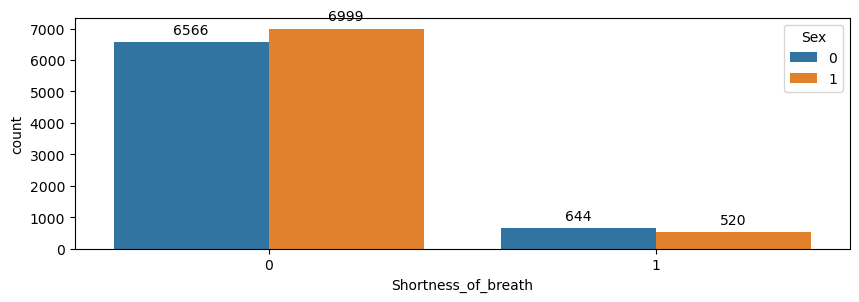

In [154]:
# CREATING A PLOT HAVING SEX AS HUE

# CHECKING WHICH SYMPTOMS ARE MOST AMONG WHICH GENDER AND WHICH GENDER IS THE MOST POPULATED WITH CORONA POSITIVE

for j, predictor in enumerate(df_positive):
    plt.figure(figsize = (10,3))
    
    #plotting the countplot using the sns.countplot function
    ax = sns.countplot(data=df_positive, x=predictor, hue='Sex')

    # using the annotate function to print the values above the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 9), 
                    textcoords='offset points')

In [194]:
df.head()

Cough_symptoms Fever Sore_throat Shortness_of_breath Headache  Corona  \
0              1     0           1                   0        0       0   
1              0     1           0                   0        0       2   
2              0     1           0                   0        0       2   
3              1     0           0                   0        0       0   
4              1     0           0                   0        0       0   

   Age_60_above  Sex  
0             0    0  
1             0    0  
2             0    0  
3             0    0  
4             0    0

In [216]:
# CHECKING FOR PATIENTS WHO HAVE ALL THE SYMPTOMS AND ARE CORONA POSITIVE
all_symp = len(df[(df['Cough_symptoms']==1) & (df['Fever']==1) & (df['Sore_throat']==1) & (df['Shortness_of_breath']==1) & (df['Headache']==1) & (df['Corona']==2)])

In [215]:
all_symp

89

## INSIGHTS FROM EDA

1. COUGH SYMPTOMS
    1. People having no cough symptoms are more
    2. Just 27% of the people having cough are positive
    3. 44% of the people having covid positive have no cough
    4. Seen more in males
    
2. FEVER 
    1. People having no fever are more
    2. Nearly 38% of the people have no fever and are covid positive
    3. Seen more in males
    
3. Sore_Throat
    1. People having sore throat and postive are really less
    2. 90% of the people being positive and having no sore throat are more 
    3.Seen more in females
    
4. Shortnes of Breath
    1. Shortness of breathness breath is less
    2. More than 90% of the people having no symptom are positive
    3. Seen more in females
    
5. Headache
    1. Headache is less
    2. More than 80% of the people have no headache are positive
    3. Seen more in females
    
6. Age
    1. People less than the age of the 60 are more 
    2. More than 85% of the people below 60 are positive
    3. Most of the people below age 60 are Males and patients above age 60 are Males

7. Sex
    1. Gender who are positive are nearly same.
    2. Most the patients are Males.
    
    
* COUGH and FEVER are the most seen symptoms in the patients. While SHORTNESS OF BREATH being the least seen symptoms.

* PEOPLE HAVING " NO COUGH AND ARE COIVD NEGATIVE " ARE MORE THAN THE PEOPLE HAVING COUGH ARE POSITIVE 

* Only 89 people have all the symptoms are testing corona positive. 

===============================================================================================================================

## Feature Engineering

In [43]:
# SELECTING ONLY THE REQUIRED COLUMNS AND SPLITTING THE DATA INTO TRAIN AND TEST SPLIT

#### Feature Selection

In [44]:
# taking the input and output variables or features

x = df.drop(['Corona'], axis=1)

# this feature is our target feature
y = df[['Corona']]

In [45]:
#from sklearn library importing the train test split function
from sklearn.model_selection import train_test_split

In [46]:
# dividing our data input and target variables into x andy train, test split
# the test and train is given in a ratio of 80-20. 80 for training and 20 testing to comprehend the overfitting problem.

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [47]:
len(x_train)

223078

In [48]:
len(y_test)

55770

#### Initiliasing the models

#### Logistic Regression

In [49]:
#IMPORTING THE LOGISTICREREGRESSION FROM LINEAR MODEL LIBRARY

from sklearn.linear_model import LogisticRegression

In [50]:
# INSTANTIATING THE MODEL 
Logrmodel = LogisticRegression()

In [51]:
# TRAINING THE MODEL
Logrmodel.fit(x_train, y_train)

LogisticRegression()

In [52]:
# PREDICITNG USING THE TEST VALUES

pred1 = Logrmodel.predict(x_test)

In [53]:
#THE ACCURACY SCORE OF LOGISTIC REGRESSION

Logrmodel.score(x_test, y_test)

0.9432311278465124

In [176]:
#PRINTING THE CONFUSION MATRIX OF THE MODEL
cm1 = confusion_matrix( y_test, pred1)


# STORING THE SCORES INTO THE VARIABLE
log_score = { 'model' : 'Logisctic Regression',
        'accuracy': accuracy_score(y_test, pred1),
        'precision_score': precision_score(y_test, pred1, average='weighted'),  
        'recall_score':recall_score(y_test, pred1, average='weighted'),   
        'f1_score':f1_score(y_test, pred1, average='weighted')}     

# THIS PRINTS THE WHOLE REPORT
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     52041
           1       0.00      0.00      0.00       791
           2       0.85      0.23      0.36      2938

    accuracy                           0.94     55770
   macro avg       0.60      0.41      0.44     55770
weighted avg       0.93      0.94      0.92     55770



<Axes: >

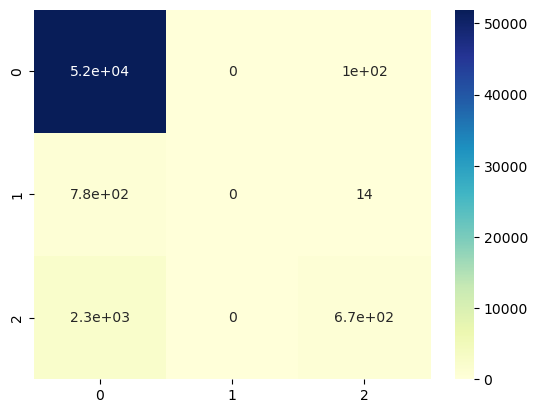

In [186]:
sns.heatmap(cm1, annot=True, cmap='YlGnBu')

#### Decision Tree

In [55]:
# INSTANTIATING THE MODEL 
Dmodel = DecisionTreeClassifier()

In [56]:
# TRAINING THE MODEL
Dmodel.fit(x_test, y_test)

DecisionTreeClassifier()

In [57]:
# PREDICITNG USING THE TEST VALUES
decisionPred = Dmodel.predict(x_test)

In [58]:
#THE ACCURACY SCORE OF DECISION TREE
Dmodel.score(x_test, y_test)

0.9441455979917518

In [187]:
#PRINTING THE CONFUSION MATRIX OF THE MODEL
cm2 = confusion_matrix( y_test, decisionPred)

# STORING THE SCORES INTO THE VARIABLE
tree_score = { 'model' : 'Decision Tree Classifier',
        'accuracy': accuracy_score(y_test, decisionPred),
        'precision_score': precision_score(y_test, decisionPred, average='weighted'),  
        'recall_score':recall_score(y_test, decisionPred, average='weighted'),   
        'f1_score':f1_score(y_test, decisionPred, average='weighted')} 

# THIS PRINTS THE WHOLE REPORT
print(classification_report(y_test,decisionPred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     52041
           1       0.50      0.00      0.00       791
           2       0.86      0.24      0.38      2938

    accuracy                           0.94     55770
   macro avg       0.77      0.41      0.45     55770
weighted avg       0.93      0.94      0.93     55770



<Axes: >

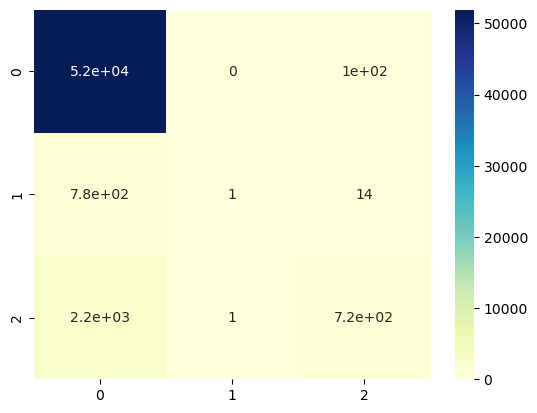

In [188]:
sns.heatmap(cm2, annot=True, cmap='YlGnBu')

#### Random Forest

In [60]:
# INSTANTIATING THE MODEL 
RFmodel = RandomForestClassifier()

In [61]:
# TRAINING THE MODEL
RFmodel.fit(x_train, y_train)

# PREDICITNG USING THE TEST VALUES
RandomPred = RFmodel.predict(x_test)

In [62]:
#THE ACCURACY SCORE OF DECISION TREE
RFmodel.score(x_test, y_test)

0.9441097364174287

In [190]:
#PRINTING THE CONFUSION MATRIX OF THE MODEL
cm3 = confusion_matrix( y_test, RandomPred)


# STORING THE SCORES INTO THE VARIABLE
rand_score = { 'model' : 'Random Forest Classifier',
        'accuracy': accuracy_score(y_test, RandomPred),
        'precision_score': precision_score(y_test, RandomPred, average='weighted'),  
        'recall_score':recall_score(y_test, RandomPred, average='weighted'),   
        'f1_score':f1_score(y_test, RandomPred, average='weighted')} 

# THIS PRINTS THE WHOLE REPORT
print(classification_report(y_test,RandomPred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     52041
           1       0.00      0.00      0.00       791
           2       0.86      0.24      0.38      2938

    accuracy                           0.94     55770
   macro avg       0.60      0.41      0.45     55770
weighted avg       0.93      0.94      0.93     55770



<Axes: >

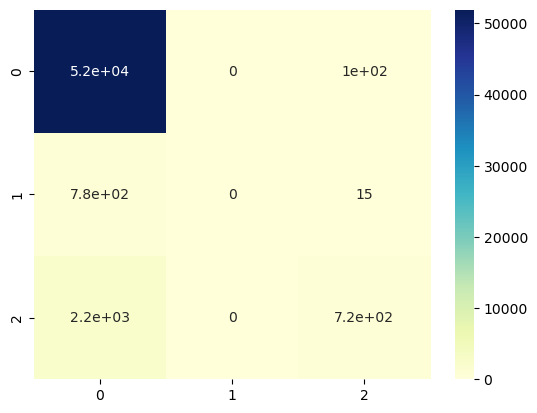

In [191]:
sns.heatmap(cm3, annot=True, cmap='YlGnBu')

#### K-Nearest Neighbors

In [78]:
# INSTANTIATING THE MODEL 
KNNmodel = KNeighborsClassifier()

In [79]:
# TRAINING THE MODEL
KNNmodel.fit(x_train, y_train)

KNeighborsClassifier()

In [80]:
# PREDICITNG USING THE TEST VALUES
K_predict = KNNmodel.predict(x_test)

In [85]:
#THE ACCURACY SCORE OF DECISION TREE
KNNmodel.score(x_test, y_test)

0.9437511206741976

In [192]:
#PRINTING THE CONFUSION MATRIX OF THE MODEL
cm4 = confusion_matrix(y_test, K_predict)


# STORING THE SCORES INTO THE VARIABLE
K_score = { 'model' : 'K-Nearest Neighbors',
        'accuracy': accuracy_score(y_test, K_predict),
        'precision_score': precision_score(y_test, K_predict, average='weighted'),  
        'recall_score':recall_score(y_test, K_predict, average='weighted'),   
        'f1_score':f1_score(y_test, K_predict, average='weighted')} 

# THIS PRINTS THE WHOLE REPORT
print(classification_report(y_test,K_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     52041
           1       0.00      0.00      0.00       791
           2       0.82      0.25      0.38      2938

    accuracy                           0.94     55770
   macro avg       0.59      0.42      0.45     55770
weighted avg       0.93      0.94      0.93     55770



<Axes: >

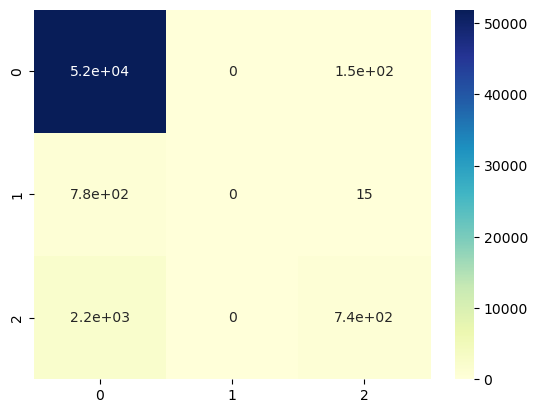

In [193]:
sns.heatmap(cm4, annot=True, cmap='YlGnBu')

===============================================================================================================================

#### HYPER PARAMETER TUNING

In [68]:
# TAKING THE MODELS LOGISTIC REGRESSION AND RANDOM FOREST CLASSIFIER
# PASSING THE PARAMETER TO TESTED

model_set1 = {
        'Logistic Regression' : {
            'model' : LogisticRegression(),
            'parameter' : {
                'C' : [10,20] 
            }
        },
        
        'Random Forest':{
            'model' : RandomForestClassifier(),
            'parameter' : {
                'n_estimators' : [1,5,10]
            }
                
        },
}

In [69]:
# USING GRIDSEARCHCV TO PERFORM HYPER PARAMETER TUNING

# GRIDSEARCHCV PERFORMS THE K-CROSS FOLD CROSS VALIDATION INTERNALLY AND PRINTS THE OUTPUT

# an empty list to store the scores of each model
score=[]

# takes the model_name and model from the above list
for model_name, mp in model_set1.items():
    
    # performs gridsearch with model as the parameter and cross validation of 5
    cv = GridSearchCV(mp['model'],mp['parameter'], cv=5, return_train_score=False)
    
    # training the data
    cv.fit(x_train,y_train)
    
    # appending the scores to the score list
    score.append({
        'model':model_name,
        'score':cv.best_score_,
        'parameter':cv.best_params_
    })

In [70]:
# TAKING THE MODELS DECISION TREE CLASSIFIER AND K NEAREST NEIGHBORS
# PASSING THE PARAMETER TO TESTED

model_set2 = {
        
         'Decision Tree' :{
            'model' : DecisionTreeClassifier(),
            'parameter' : {
                'criterion' : ['gini','entropy']
            }
        },
     
        'K-Nearest Neighbors':{
            'model' : KNeighborsClassifier(n_neighbors=5),
            'parameter' : {
                'weights' : ['uniform', 'distance'],
            }
        }
 }

In [109]:
# USING RANDOMIZEDSEARCHCV TO PERFORM HYPER PARAMETER TUNING

# RANDOMIZEDSEARCHCV PERFORMS RANDOMIZED CROSS VALIDATION WHICH IS HELPFUL AGAINST BIG DATASET


# an empty list to store the scores of each model
score2=[]

# takes the model_name and model from the above list
for model_name, mp in model_set2.items():
    
    # performs gridsearch with model as the parameter and cross validation of 5
    cv = RandomizedSearchCV(mp['model'],mp['parameter'], cv=5, return_train_score=False)
    
    # training the data
    cv.fit(x_train,y_train)
    
    
    # appending the scores to the score list
    score2.append({
        'model':model_name,
        'score':cv.best_score_,
        'parameter':cv.best_params_
    })

In [161]:
# TAKING THE ACCURACY SCORES FROM THE ABOVE FOR LOOPS AND CONCATENATING THEM

best_model = score + score2
best_model

[{'model': 'Logistic Regression',
  'score': 0.9437730274621972,
  'parameter': {'C': 10}},
 {'model': 'Random Forest',
  'score': 0.9445754376228346,
  'parameter': {'n_estimators': 10}},
 {'model': 'Decision Tree',
  'score': 0.9445485410401918,
  'parameter': {'criterion': 'gini'}},
 {'model': 'K-Nearest Neighbors',
  'score': 0.9433292452022786,
  'parameter': {'weights': 'uniform'}}]

===============================================================================================================================

## Model Evaluation

In [217]:
# Evaluate models on accuracy, precision, recall, and F1-score

In [169]:
best_model_score = pd.DataFrame(best_model, columns=['model','score','parameter'])

In [218]:
# TAKING THE OTHER SCORES OF ALL THE MODELS AND PRINTING THEM TO COMPARE 

# storing the scores variable into a list
model_scores = [log_score, tree_score, rand_score, K_score]

# giving the list to a dataframe
model_scores_df = pd.DataFrame(model_scores, columns=['model','accuracy','precision_score','recall_score','f1_score'])


==============================================================================================================================

## Results

In [219]:
# Print model performance results
model_scores_df

model  accuracy  precision_score  recall_score  f1_score
0      Logisctic Regression  0.943231         0.926139      0.943231  0.924548
1  Decision Tree Classifier  0.944146         0.934632      0.944146  0.926119
2  Random Forest Classifier  0.944110         0.927355      0.944110  0.926089
3       K-Nearest Neighbors  0.943751         0.925750      0.943751  0.926168

BY PERFORMING ALL THE ABOVE PERFORMANCE METRICS WE CAN SEE ALL THE MODELS ALMOST GIVING THE SAME RESULTS. 

BUT, FROM THE ABOVE EVALUATION METRICS " DECISION TREE CLASSIFIER " IS GIVING THE BEST RESULTS WHEN COMPARED TO THE OTHER MODELS.

WHEN TAKING THE ACCURACY, PRECISION SCORE, RECALL SCORE AND F1_SCORE INTO CONSIDERATION

"DECISION TREE CLASSIFIER" IS GIVING THE BEST RESULTS FOR THE GIVEN DATASET.

In [220]:
# Print model best parameters
best_model_score

model     score               parameter
0  Logistic Regression  0.943773               {'C': 10}
1        Random Forest  0.944575    {'n_estimators': 10}
2        Decision Tree  0.944549   {'criterion': 'gini'}
3  K-Nearest Neighbors  0.943329  {'weights': 'uniform'}

AFTER PERFORMING ALL THE REQUIRED STEPS IN HYPER PARAMETER TUNING, THE ABOVE TABLE CONCLUDES :- 
    
    * RANDOM FOREST IS GIVING THE BEST POSSIBLE RESULTS FROM OTHER MODELS BY TUNING THE CRITERION AS GINI.
    
    * WHILE THE DECISION TREE CLASSIFIER IS GIVING THE SIMILAR OUTPUT 

" FINALLY WE CAN CONCLUDE THAT " DECISION TREE CLASSIFIER" IS GIVING THE BEST RESULTS FOR THIS DATASET. "

===============================================================================================================================

In [295]:
# PRINTING THE FINAL TABLE WITH ALL THE IMPORTANT

# creating a list of all totals
total = { 
        'Number of Patients' : len(df), 
        'Corona Positive Patients': len(df[df["Corona"]==2]), 
        'All symptoms & Positive': all_symp, 
        'Females Positive Patients': len(df[(df["Corona"]==2) & (df['Sex']==0)]), 
        'Male Positive Patients': len(df[(df["Corona"]==2) & (df['Sex']==1)])}

# providin an indexing for the total dataframe
index = ['Count']

# creating a dataframe for better viewing
total_df = pd.DataFrame(total, columns=['Number of Patients', 'Corona Positive Patients','All symptoms & Positive','Females Positive Patients','Male Positive Patients'], index=index)

In [345]:
# concatenating two dataframe - one with all the totals and other with total symptoms in positive patients
total_df = pd.concat([total_df, positive_sym], axis=1)

In [346]:
# Final Table

total_df

Number of Patients  Corona Positive Patients  All symptoms & Positive  \
Count              278848                     14729                       89   

       Females Positive Patients  Male Positive Patients  Cough_symptoms  \
Count                       7210                    7519            6584   

       Fever  Sore_throat  Shortness_of_breath  Headache  
Count   5559         1526                 1164      2235

In [ ]:
Questions - 
    
    * Among the data how many people are actually covid positive?
    * Among the covid positive which are the major symptoms?
    * Are age groups above 60 the most affected?
    * Does a person having corona have cough?
    * Which gender is most likely to have been infected?
    * Do covid patients have all the symptoms?
    * What do other value signify in the target column?
    

Answers or Insights - 
    
    * From the whole data only 6% of the patients are covid positive.
    * The major symptoms are COUGH and FEVER.
    * The age groups BELOW 60 are the most infected.
    * Yes a person having covid has cough but not all.
    * Males are likely to be sightly more infected when compared to females.
    * A small percentage about 0.03% of people have all th symptoms.
    * The other values in the CORONA feature are the patients with results yet to come.

In [351]:
pip install duckdb


  Obtaining dependency information for duckdb from https://files.pythonhosted.org/packages/2e/60/04503bb5bffe0edeccb223b275b487fbb006dc0fd23513ed2dac03641429/duckdb-0.9.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.3 MB 262.6 kB/s eta 0:00:40
   ---------------------------------------- 0.0/10.3 MB 281.8 kB/s eta 0:00:37
   ---------------------------------------- 0.1/10.3 MB 654.9 kB/s eta 0:00:16
   - -------------------------------------- 0.3/10.3 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/10.3 MB 2.0 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/10.3 MB 3.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.3 MB 4.1 MB/s eta 0:00:03
   ------- ---------------------------

In [352]:
# IMPORTING DUCKDB TO PERFORM SQL ANALYSIS ON THE CLEAN DATA

import duckdb

In [354]:
# IMPORTING THE CLEAN DATA 
database = pd.read_csv('result1.csv')

In [355]:
# INITIATING THE DUCKDB DATABASE,CONNECTING AND REGISTERING IT 
con = duckdb.connect()
con.register('db',database)

In [357]:
# PRINTING ALL RECORDS FROM THE DATABASE

con.execute('select * from db').fetchdf()

Ind_ID   Test_date           Known_contact  Cough_symptoms  Fever  \
0            1  11-03-2020                  Abroad            True  False   
1            2  11-03-2020                  Abroad           False   True   
2            3  11-03-2020                  Abroad           False   True   
3            4  11-03-2020                  Abroad            True  False   
4            5  11-03-2020  Contact with confirmed            True  False   
...        ...         ...                     ...             ...    ...   
278843  278844  30-04-2020                   Other           False  False   
278844  278845  30-04-2020                   Other           False  False   
278845  278846  30-04-2020                   Other           False  False   
278846  278847  30-04-2020                   Other           False  False   
278847  278848  30-04-2020                   Other           False  False   

        Sore_throat  Shortness_of_breath  Headache    Corona Age_60_above  \
0              True                False     False  negative           No   
1             False                False     False  positive           No   
2             False                False     False  positive           No   
3             False                False     False  negative           No   
4             False                False     False  negative           No   
...             ...                  ...       ...       ...          ...   
278843        False                False     False  positive           No   
278844        False                False     False  negative           No   
278845        False                False     False  negative           No   
278846        False                False     False  negative           No   
278847        False                False     False  negative           No   

           Sex  
0       female  
1       female  
2       female  
3       female  
4       female  
...        ...  
278843    male  
278844  female  
278845    male  
278846    male  
278847  female  

[278848 rows x 11 columns]

In [473]:
# 1. Find the number of corona patients who faced shortness of breath.
con.execute("select count(*) as Patient_Count from db where Shortness_of_breath='True' and Corona = 'positive'").fetchdf()

Patient_Count
0           1164

In [474]:
# 2. Find the number of negative corona patients who have fever and sore_throat. 
con.execute("select count(*) as Patient_Count from db where Fever and Sore_throat = 'True' and Corona = 'negative'").fetchdf()

Patient_Count
0            121

In [475]:
# 3.Group the data by month and rank the number of positive cases.

con.execute(""" with cte as ( SELECT Ind_ID, strptime( Test_date, '%d-%m-%Y') as date
                FROM db)
                select monthname(date) as month, count(*) as Cases from db
                inner join cte using (Ind_ID) 
                where Corona = 'positive'
                group by month
                order by Cases desc""").fetchdf()

month  Cases
0  April   8881
1  March   5848

In [476]:
# 4. Find the female negative corona patients who faced cough and headache.

con.execute("select count(*) Patient_Count from db where Cough_symptoms and Headache = 'True' and Sex = 'female' and Corona = 'negative' ").fetchdf()

Patient_Count
0             60

In [477]:
# 5. How many elderly corona patients have faced breathing problems?

con.execute("select count(*) Patient_Count from db where Age_60_above = 'Yes' and Shortness_of_breath = 'True 'and Corona ='positive'").fetchdf()

Patient_Count
0              0

In [478]:
# 6. Which three symptoms were more common among COVID positive patients?

con.execute("""select (select count(*) Patient_Count from db where Cough_symptoms = 'True' and Corona = 'positive') as Cough_count,
            (select count(*) Patient_Count from db where Fever = 'True' and Corona = 'positive') as Fever_count,
            (select count(*) Patient_Count from db where Sore_throat = 'True' and Corona = 'positive') as Sore_throat_count,
            (select count(*) Patient_Count from db where Shortness_of_breath = 'True' and Corona = 'positive') as Breath_count,
            (select count(*) Patient_Count from db where Headache = 'True' and Corona = 'positive') as Headache_count""").fetchdf()

Cough_count  Fever_count  Sore_throat_count  Breath_count  Headache_count
0         6584         5559               1526          1164            2235

In [479]:
# 7. Which symptom was less common among COVID negative people?

con.execute("""select (select count(*) Patient_Count from db where Cough_symptoms = 'True' and Corona = 'negative') as Cough_count,
            (select count(*) Patient_Count from db where Fever = 'True' and Corona = 'negative') as Fever_count,
            (select count(*) Patient_Count from db where Sore_throat = 'True' and Corona = 'negative') as Sore_throat_count,
            (select count(*) Patient_Count from db where Shortness_of_breath = 'True' and Corona = 'negative') as Breath_count,
            (select count(*) Patient_Count from db where Headache = 'True' and Corona = 'negative') as Headache_count""").fetchdf()

Cough_count  Fever_count  Sore_throat_count  Breath_count  Headache_count
0        34987        15816                366           385             148

In [480]:
# 8. What are the most common symptoms among COVID positive males whose known contact was abroad?

con.execute("""select Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, count(*) as a from db 
            where Corona = 'positive' AND Known_contact = 'Abroad' AND Sex = 'male'
            group by Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache 
            order by a desc
            limit 1;""").fetchdf()


Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache    a
0            True  False        False                False     False  189